<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-125/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto, 2da entrega
Estefania Abigail Castro Belmont A01332636

Vladimir Salazar Altamirano A01793118

Materia: Ciencia y analítica de datos

Profesor: Maria de la Paz Rico

Tutor: Julio César Galindo López

18/11/2022

Clasificación
En esta base de datos encontraras:

**Aguas subterráneas**

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

Selecciona tus variables independientes X y dependiente Y (semáforo)

Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

Realiza un análisis general de las features importances a traves de decision trees o random forest.

Selecciona las variables de mayor importancia.

Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

Explora que clasificador es el más optimo, ejemplo:
Decision trees

Random Forest.

Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

##Base de datos de aguas subterraneas

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-125/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
                 sep=',',
                 encoding='cp1252')
                 
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


##Limpieza anterior

In [3]:
#Eliminamos las columnas con mayor cantidad de datos nulos.
ndf = df.copy()
ndf.drop(columns=['SDT_mg/L','CONTAMINANTES'], inplace=True)

In [4]:
#Hacemos una lista con las columnas numéricas.
#Se le quita el "<" para Phyton pueda leer esos datos como numéricos.
num_posibles=["SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL",
              "N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L",
              "HG_TOT_mg/L","PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]

ndf[num_posibles]=ndf[num_posibles].replace({'<':''}, regex=True)
ndf[num_posibles]=ndf[num_posibles].astype(float)

In [5]:
#Todas las columnas de tipo objeto, las añadimos a las de tipo cualitativo.
#Son dos listas, una para datos de tipo numérico, y otra para tipo cualitativo.
cual_col=[]
num_col=[]
for n in ndf:
  if (ndf[n].dtype)=='object':
    cual_col.append(n)
  else:
    num_col.append(n)

In [6]:
#Las numéricas las completamos con la media, y las categóricas con la moda.
for c in num_col:
  ndf[c]=ndf[c].fillna(ndf[c].median())
for c in cual_col:
  ndf[c]=ndf[c].fillna(ndf[c].mode()[0])

In [7]:
#Checamos si ya no hay datos nulos.
ndf.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

##Selecciona tus variables independientes X y dependiente Y (semáforo)

In [8]:
#Dividimos las columnas que usaremos como variables independientes "X", y la variable de salida "Y".
X=ndf[['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']]
y=ndf[['SEMAFORO']]

##Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [9]:
#Usamos label encoder, para convertir las clases del semáforo de categóricas a numéricas.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
#Transformamos las clases.
y['SEMAFORO']=le.fit_transform(y['SEMAFORO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Revisamos qué clases fueron las que se encontraron.
le.classes_

array(['Amarillo', 'Rojo', 'Verde'], dtype=object)

In [12]:
#Transformamos a 0, 1, 2.
le.inverse_transform([0,1,2])

array(['Amarillo', 'Rojo', 'Verde'], dtype=object)

In [13]:
#Convertimos todas las variables categóricas a numéricas, codificando dichas variables
for c in X.columns:
  X[c]=le.fit_transform(X[c])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [14]:
#Preparamos para hacer un bosque aleatorio
#Revisamos la importancia de cada una de las columnas para el algoritmo
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X, y)
s=[]
n=[]
for score, name in zip(rnd_clf.feature_importances_, X.columns):
  s.append(score)
  n.append(name)
  print(round(score, 2),name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.01 CLAVE
0.0 SITIO
0.0 ORGANISMO_DE_CUENCA
0.0 ESTADO
0.01 MUNICIPIO
0.0 ACUIFERO
0.0 SUBTIPO
0.01 LONGITUD
0.01 LATITUD
0.0 PERIODO
0.01 ALC_mg/L
0.0 CALIDAD_ALC
0.03 CONDUCT_mS/cm
0.0 CALIDAD_CONDUC
0.03 SDT_M_mg/L
0.01 CALIDAD_SDT_ra
0.01 CALIDAD_SDT_salin
0.08 FLUORUROS_mg/L
0.07 CALIDAD_FLUO
0.05 DUR_mg/L
0.05 CALIDAD_DUR
0.04 COLI_FEC_NMP/100_mL
0.01 CALIDAD_COLI_FEC
0.04 N_NO3_mg/L
0.04 CALIDAD_N_NO3
0.05 AS_TOT_mg/L
0.01 CALIDAD_AS
0.0 CD_TOT_mg/L
0.0 CALIDAD_CD
0.01 CR_TOT_mg/L
0.01 CALIDAD_CR
0.0 HG_TOT_mg/L
0.0 CALIDAD_HG
0.01 PB_TOT_mg/L
0.0 CALIDAD_PB
0.03 MN_TOT_mg/L
0.02 CALIDAD_MN
0.03 FE_TOT_mg/L
0.02 CALIDAD_FE
0.01 CUMPLE_CON_ALC
0.01 CUMPLE_CON_COND
0.0 CUMPLE_CON_SDT_ra
0.0 CUMPLE_CON_SDT_salin
0.07 CUMPLE_CON_FLUO
0.04 CUMPLE_CON_DUR
0.04 CUMPLE_CON_CF
0.03 CUMPLE_CON_NO3
0.04 CUMPLE_CON_AS
0.0 CUMPLE_CON_CD
0.01 CUMPLE_CON_CR
0.0 CUMPLE_CON_HG
0.0 CUMPLE_CON_PB
0.02 CUMPLE_CON_MN
0.02 CUMPLE_CON_FE


In [15]:
#Identificamos las variables independientes de mayor relevancia.
scores = pd.DataFrame(n,s)
scores.sort_index(ascending=False)

,0
0.076073,FLUORUROS_mg/L
0.072027,CALIDAD_FLUO
0.068806,CUMPLE_CON_FLUO
0.053134,AS_TOT_mg/L
0.052446,DUR_mg/L
0.048240,CALIDAD_DUR
0.042684,COLI_FEC_NMP/100_mL
0.042309,CUMPLE_CON_DUR
0.041361,N_NO3_mg/L
0.038749,CUMPLE_CON_AS


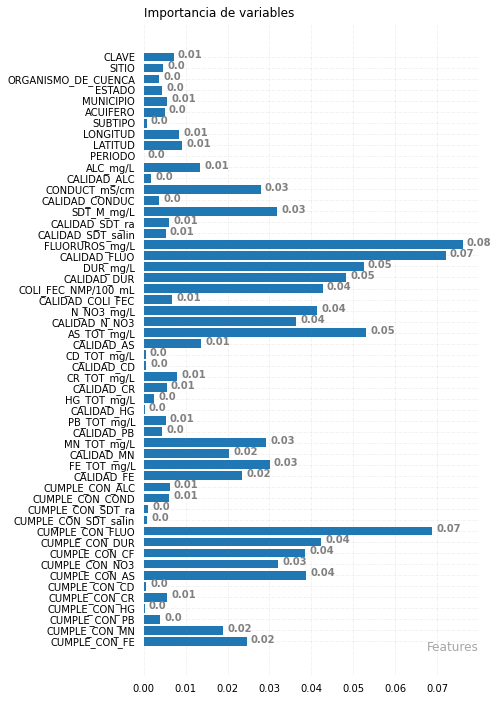

In [16]:
#Graficamos las variables independientes de mayor relevancia.
fig, ax = plt.subplots(figsize =(6, 12))
 
# Horizontal Bar Plot
name = n
cant = s
ax.barh(name, cant)
 
# Remove axes splines
for p in ['top', 'bottom', 'left', 'right']:
    ax.spines[p].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Importancia de variables',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, "Features",fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

##Selecciona las variables de mayor importancia.

In [17]:
#0.01 CLAVE
#0.01 MUNICIPIO
#0.01 LONGITUD
#0.01 LATITUD
#0.01 ALC_mg/L
#0.01 CALIDAD_SDT_ra
#0.01 CALIDAD_SDT_salin
#0.01 CALIDAD_COLI_FEC
#0.01 CALIDAD_AS
#0.01 CR_TOT_mg/L
#0.01 CALIDAD_CR
#0.01 PB_TOT_mg/L
#0.01 CUMPLE_CON_ALC
#0.01 CUMPLE_CON_COND
#0.01 CUMPLE_CON_CR

#0.03 CONDUCT_mS/cm
#0.03 SDT_M_mg/L
#0.08 FLUORUROS_mg/L
#0.07 CALIDAD_FLUO
#0.05 DUR_mg/L
#0.05 CALIDAD_DUR
#0.04 COLI_FEC_NMP/100_mL
#0.04 N_NO3_mg/L
#0.04 CALIDAD_N_NO3
#0.05 AS_TOT_mg/L
#0.03 MN_TOT_mg/L
#0.02 CALIDAD_MN
#0.03 FE_TOT_mg/L
#0.02 CALIDAD_FE
#0.07 CUMPLE_CON_FLUO
#0.04 CUMPLE_CON_DUR
#0.04 CUMPLE_CON_CF
#0.03 CUMPLE_CON_NO3
#0.04 CUMPLE_CON_AS
#0.02 CUMPLE_CON_MN
#0.02 CUMPLE_CON_FE


In [18]:
#Seleccionamos las variables de mayor importancia
X = ndf[['CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','CALIDAD_FLUO','DUR_mg/L',
        'CALIDAD_DUR','COLI_FEC_NMP/100_mL','N_NO3_mg/L','CALIDAD_N_NO3','AS_TOT_mg/L',
        'MN_TOT_mg/L','CALIDAD_MN','FE_TOT_mg/L','CALIDAD_FE','CUMPLE_CON_FLUO',
        'CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_MN',
        'CUMPLE_CON_FE']]

In [19]:
#Convertimos las variables categóricas a numéricas
for c in X.columns:
  X[c]=le.fit_transform(X[c])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [20]:
#Dividimos los datos entre entrenamiento y prueba.
#Generamos tres modelos (bosque aleatorio, máquina de vectores de soporte y árboles de decisión)
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

##Explora que clasificador es el más optimo, ejemplo: Decision trees, Random Forest.

In [21]:
#Obtenemos accuracy e identificamos cuál es el clasificador más óptimo.
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test).round(2))

rf = 0.96
dt = 0.91
svc = 0.8


Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

In [22]:
#Determinamos el grado de exactitud
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9532710280373832

In [23]:
y_pred=rf.predict(X_test)

In [24]:
#Generamos el reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.99      0.94      0.96        78
           2       0.96      0.99      0.97        87

    accuracy                           0.95       214
   macro avg       0.95      0.95      0.95       214
weighted avg       0.95      0.95      0.95       214



In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

In [26]:
#Se binarizan las variables de salida.
#Es como si ahora Y quedara en tres columnas.
#La primera columna para la clase 0, la segunda, para la clase 1, y la tercera para la clase 2.
n_classes = len(set(y["SEMAFORO"]))

Y = label_binarize(y["SEMAFORO"], classes=list(y["SEMAFORO"].unique()))

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

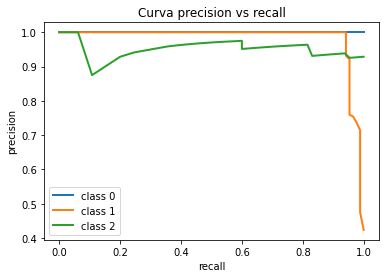

In [27]:
#Hacemos la Curva de Precision Recall
#Para la clase 0, parece que la clasifica muy bien.
#Para la clase 1, parece que la clasifica muy bien precision hasta tener alrededor de .95 de recall, ya que pasando ese valor desciende el recall.
#Para la clase 2 se tiene un comportamiento con mayor variabilidad entre precision y recall. A partir de .85 de recall desciende la precision.
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Curva precision vs recall")
plt.show()

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

In [33]:
#Generamos la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Positivo','Falsos', 'Falsos',
         'Falsos','Verdaderos Positivos', 'Falsos',
         'Falsos','Falsos', 'Verdadero Positivo']
  vf = [ '( VN )', '( F )','( F )', 
        '( F )', '( VP )','( F )',
        '( F )', '( F )','( VP )'
        ]
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(3,3)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()


In [34]:
mi_cm(y_test, y_pred)

ValueError: ignored

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.


Con relación al Reporte de Clasificación, tenemos lo siguiente:
- La exactitud alcanzó 0.96, lo cual se considera un buen desempeño. Es decir, cuántos predijo bien del total.
- La clase 2 es la que clasifica mejor, conforme a las métricas obtenidas.
- Con relación a la métrica precision, la clase que mejor predijo el modelo es la 1.
- Con relación a la métrica recall, la clase que mejor predijo el modelo es la 2.
- Con relación a la métrica f1-score, la clase que mejor predijo el modelo es la 2.

Con relación a la Curva de Precision Recall, se tiene lo siguiente:
Para la clase 0, parece que la clasifica muy bien.
Para la clase 1, parece que la clasifica muy bien precision hasta tener alrededor de .95 de recall, ya que pasando ese valor desciende el recall.
Para la clase 2 se tiene un comportamiento con mayor variabilidad entre precision y recall. A partir de .85 de recall desciende la precision.

Con relación a la matriz de confusión, tenemos lo siguiente:
Hubo cinco que etiquetó con etiqueta cero, pero que realmente eran etiqueta 1 (2.3%).
Hubo cuatro que etiquetó como etiqueta 2, pero realmente eran etiqueta cero (1.9%).
Por lo anterior, se considera que el algoritmo si es bueno para predecir la calidad del agua.
De la clase 0, tenemos 45 de 49 datos que predijo bien para la clase cero, y que representan el 21% del total de datos.
De la clase 1, tenemos 73 de 78 datos que predijo bien para la clase 1, y que representan el 34.1% del total de datos.
De la clase 2, tenemos 87 de 87 datos que predijo bien para la clase 2, y que representan el 40.7% del total de datos.



In [ ]:
Dear participates, thank you for attending this course, we would like to invite you take a short interview after this lecture. If you would like to take this interview, please feel free to stay for a short time after Q&A with Professor, this is a good chance for showcasing yourself. Looking forward to meeting you face to face online. (This interview may need in Tsinghua news)
We will ask following questions: 
Please introduce yourself, your name, where are you from, where are you studying or working, which major, etc.
1.Why did you choose this course? 
2.How did you feel about this course? How is it different from other courses you have attended before?
3. What have you gained from this course？
4. How much of your learning is now done online?
5.How do you think digital technologies will reshape the future of higher education?
Your participation and answers will be very meaningful for knowledge sharing. 


Jobish
Thanks professor. 
王运涛
Yuntao Wang, yuntaowang@tsinghua.edu.cn, https://pi.cs.tsinghua.edu.cn/lab/people/YuntaoWang/ 